In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set_theme(style="ticks")
import plotly.express as px

In [9]:
df = pd.read_csv("cleaned_data_GBP_to_NGN_2001-2020.csv", index_col=False)

In [10]:
df.head()

,Unnamed: 0,rate_date,currency,rate_year,rate_month,buying_rate
0,1172,2020-12-31,POUNDS STERLING,2020,December,517.3350
1,1184,2020-12-30,POUNDS STERLING,2020,December,515.8948
2,1196,2020-12-29,POUNDS STERLING,2020,December,511.8395
3,1208,2020-12-24,POUNDS STERLING,2020,December,514.9852
4,1220,2020-12-23,POUNDS STERLING,2020,December,508.5422


In [20]:
df.drop(index=[1,0], axis=1)

,Unnamed: 0,rate_date,currency,rate_year,rate_month,buying_rate
2,1196,2020-12-29,POUNDS STERLING,2020,December,511.8395
3,1208,2020-12-24,POUNDS STERLING,2020,December,514.9852
4,1220,2020-12-23,POUNDS STERLING,2020,December,508.5422
5,1232,2020-12-22,POUNDS STERLING,2020,December,508.1253
6,1244,2020-12-21,POUNDS STERLING,2020,December,502.9709
...,...,...,...,...,...,...
4659,46429,2001-12-14,POUNDS STERLING,2001,December,162.5786
4660,46440,2001-12-13,POUNDS STERLING,2001,December,161.7015
4661,46441,2001-12-12,POUNDS STERLING,2001,December,161.1759
4662,46452,2001-12-11,POUNDS STERLING,2001,December,160.1580


In [26]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [27]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate
0,2020-12-31,POUNDS STERLING,2020,December,517.3350
1,2020-12-30,POUNDS STERLING,2020,December,515.8948
2,2020-12-29,POUNDS STERLING,2020,December,511.8395
3,2020-12-24,POUNDS STERLING,2020,December,514.9852
4,2020-12-23,POUNDS STERLING,2020,December,508.5422


In [28]:
df

,rate_date,currency,rate_year,rate_month,buying_rate
0,2020-12-31,POUNDS STERLING,2020,December,517.3350
1,2020-12-30,POUNDS STERLING,2020,December,515.8948
2,2020-12-29,POUNDS STERLING,2020,December,511.8395
3,2020-12-24,POUNDS STERLING,2020,December,514.9852
4,2020-12-23,POUNDS STERLING,2020,December,508.5422
...,...,...,...,...,...
4659,2001-12-14,POUNDS STERLING,2001,December,162.5786
4660,2001-12-13,POUNDS STERLING,2001,December,161.7015
4661,2001-12-12,POUNDS STERLING,2001,December,161.1759
4662,2001-12-11,POUNDS STERLING,2001,December,160.1580


In [29]:
df1 = df[["buying_rate"]].copy

In [32]:
df1

<bound method NDFrame.copy of       buying_rate
0        517.3350
1        515.8948
2        511.8395
3        514.9852
4        508.5422
...           ...
4659     162.5786
4660     161.7015
4661     161.1759
4662     160.1580
4663     160.0238

[4664 rows x 1 columns]>

In [33]:
from statsmodels.tsa.stattools import adfuller

In [38]:
result = adfuller(df.buying_rate.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.5176236393887637
p-value: 0.1112449747669701


In [40]:
#checks if price is stationary 

result = adfuller(df.buying_rate)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.5176236393887637
p-value: 0.1112449747669701


In [41]:
from statsmodels.graphics.tsaplots import plot_acf

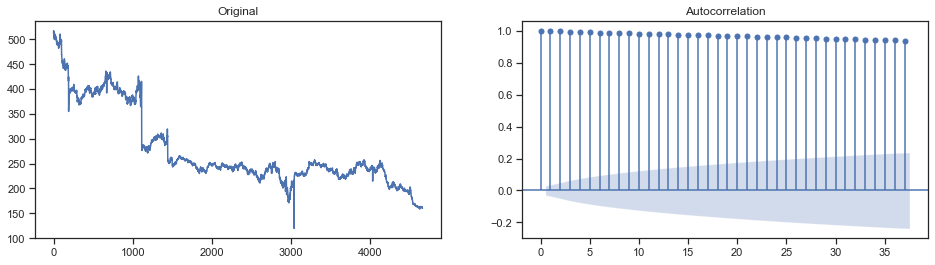

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16,4))

ax1.plot(df.buying_rate)
ax1.set_title("Original")

plot_acf(df.buying_rate, ax=ax2);

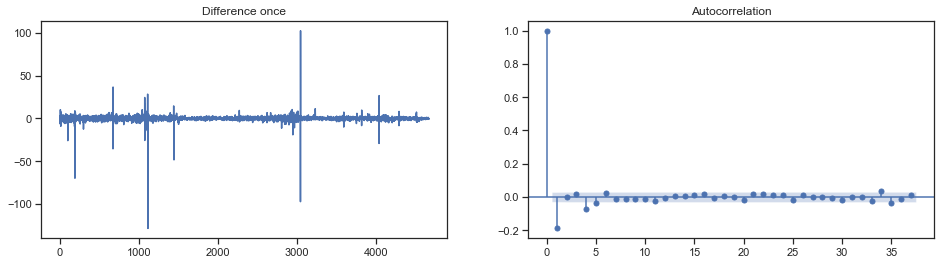

In [47]:
diff = df.buying_rate.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

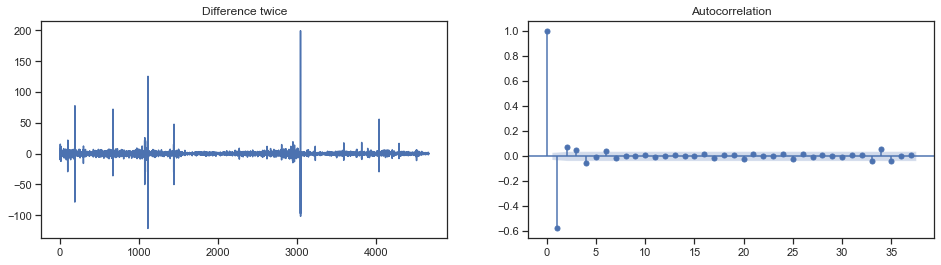

In [49]:
diff = df.buying_rate.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16,4))
ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

In [ ]:
#from pmdarima.arima.utils import ndiffs

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf 

In [61]:
#p term

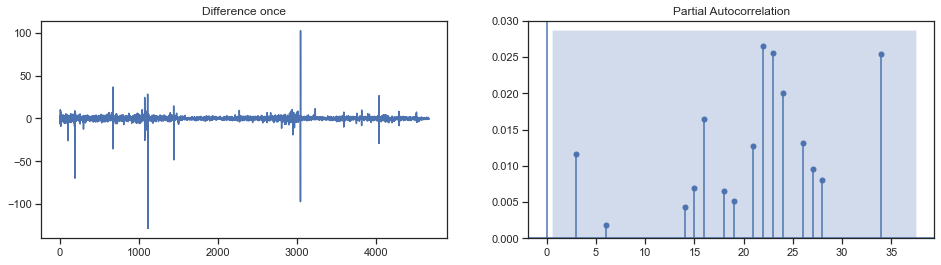

In [60]:
diff = df.buying_rate.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,0.03) 
plot_pacf(diff, ax=ax2);

In [62]:
#q term

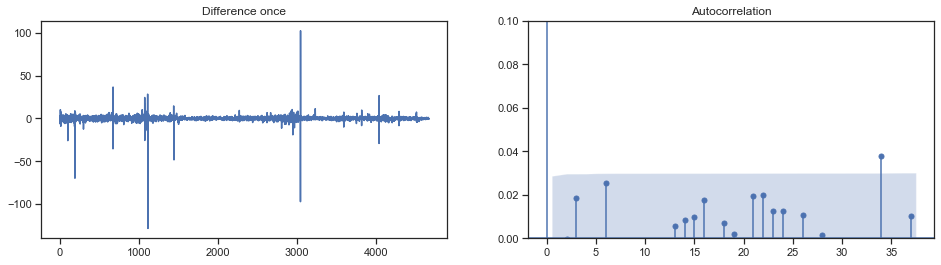

In [64]:
diff = df.buying_rate.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,0.1) 
plot_acf(diff, ax=ax2); 

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
model = ARIMA(df.buying_rate, order=(3,1,3))
result = model.fit(disp=0)

C:\Users\bunmi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [68]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.buying_rate   No. Observations:                 4663
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -12743.190
Method:                       css-mle   S.D. of innovations              3.721
Date:                Wed, 04 Aug 2021   AIC                          25502.379
Time:                        16:29:35   BIC                          25553.958
Sample:                             1   HQIC                         25520.521
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0761      0.035     -2.196      0.028      -0.144      -0.008
ar.L1.D.buying_rate     0.4477      0.154      2.899      0.004       0.145       0.750
ar.L2.D.buying_r

(array([1.02656913e-05, 1.02656913e-05, 1.02656913e-05, 1.02656913e-05,
        4.10627651e-05, 1.21340471e-02, 3.56014173e-02, 4.10627651e-05,
        0.00000000e+00, 1.02656913e-05]),
 array([-126.19782988, -105.30744768,  -84.41706548,  -63.52668328,
         -42.63630108,  -21.74591888,   -0.85553668,   20.03484552,
          40.92522772,   61.81560991,   82.70599211]),
 <BarContainer object of 10 artists>)

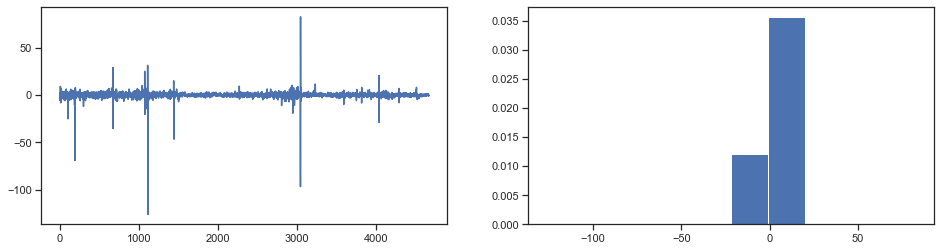

In [69]:
#plot residual errors

residuals = pd.DataFrame(result.resid) 

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density = True)

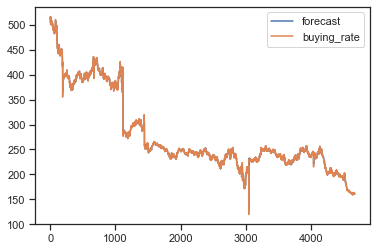

In [73]:
#Actual vs Fitted

result.plot_predict();

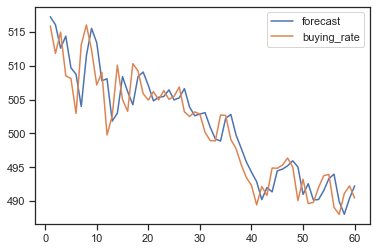

In [76]:
#Actual vs Fitted

result.plot_predict(start =1, end=60, dynamic=False);

In [78]:
df1 = df["buying_rate"]

In [79]:
n = int(len(df1) * 0.8)
train = df1[:n]
test=df1[n:] 

In [80]:
print(len(train))

3731


In [81]:
print(len(test))

933


In [83]:
model1 = ARIMA(train, order=(3,1,3))
result1 = model1.fit(disp=0)

C:\Users\bunmi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\bunmi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [84]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.buying_rate   No. Observations:                 3730
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -10508.652
Method:                       css-mle   S.D. of innovations              4.049
Date:                Wed, 04 Aug 2021   AIC                          21033.303
Time:                        16:46:07   BIC                          21083.097
Sample:                             1   HQIC                         21051.017
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0772      0.042     -1.858      0.063      -0.159       0.004
ar.L1.D.buying_rate     0.4556      0.172      2.648      0.008       0.118       0.793
ar.L2.D.buying_rate    -0.3740      0.145     -2.576      0.010      -0.659      -0.089
ar.L3.D.buying_rate     0.4173      0.062      6.724      0.000       0.296       0.539
ma.L1.D.buying_rate    -0.6560      0.170     -3.847      0.000      -0.990      -0.322
ma.L2.D.buying_rate     0.4680      0.175      2.670      0.008       0.124       0.811
ma.L3.D.buying_rate    -0.4981      0.057     -8.664      0.000      -0.611      -0.385
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3727           -0.0000j            1.3727           -0.0000
AR.2           -0.2382           -1.2997j            1.3213           -0.2789
AR.3           -0.2382           +1.2997j            1.3213            0.2789
MA.1            1.2153           -0.0000j            1.2153           -0.0000
MA.2           -0.1379           -1.2779j            1.2853           -0.2671
MA.3           -0.1379           +1.2779j            1.2853            0.2671
-----------------------------------------------------------------------------
"""

In [97]:
step = 300 

fc, se, conf = result1.forecast(step)

In [98]:
fc

array([227.65324014, 227.59598946, 227.4955879 , 227.24858258,
       227.11103021, 227.06016357, 226.94668606, 226.8179364 ,
       226.74181405, 226.66925439, 226.57226442, 226.48477126,
       226.4122275 , 226.3327492 , 226.24848365, 226.17086818,
       226.09517919, 226.01588343, 225.93699884, 225.86045423,
       225.78331698, 225.7052062 , 225.62784991, 225.55095414,
       225.47357981, 225.39613005, 225.31901704, 225.24188599,
       225.16458929, 225.08736441, 225.01022665, 224.93303261,
       224.85581032, 224.77863255, 224.70146215, 224.62426667,
       224.54707558, 224.46989895, 224.3927168 , 224.31552856,
       224.23834564, 224.16116512, 224.08398117, 224.00679696,
       223.92961494, 223.85243256, 223.77524911, 223.69806621,
       223.62088381, 223.54370099, 223.46651802, 223.38933534,
       223.31215268, 223.23496986, 223.15778707, 223.08060438,
       223.00342164, 222.92623887, 222.84905613, 222.7718734 ,
       222.69469065, 222.6175079 , 222.54032516, 222.46

In [99]:
#fc = forecast
#se = standard error
#conf = confidence interval (lower and upper limit)

In [100]:
fc = pd.Series(fc, index=test[:step].index) 

lower = pd.Series(conf[:,0], index=test[:step].index) 
upper = pd.Series(conf[:,1], index=test[:step].index) 


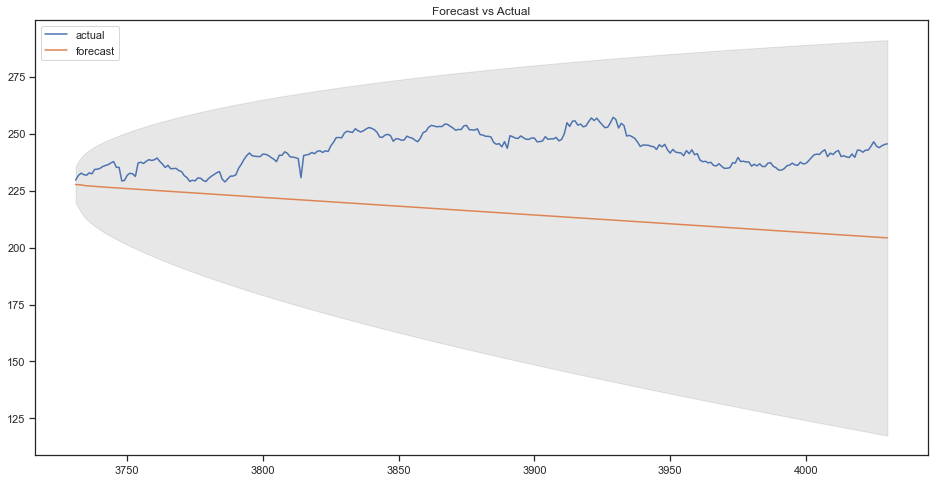

In [101]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label = "forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [1]:
#!pip install pmdarima

In [103]:
from pmdarima.arima.utils import ndiffs